In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading data as data frame.
df = pd.read_csv('drive/MyDrive/lyrics-data.csv')
df.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [5]:
# Dropping unnecessary columns.
df.drop(['ALink','SName','SLink'],axis=1,inplace=True)

<Axes: >

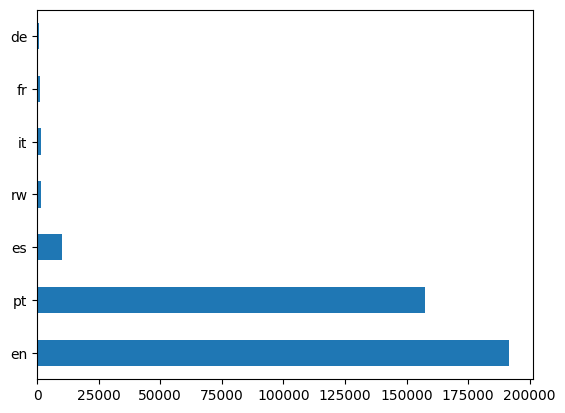

In [6]:
# value count
counts= df['language'].value_counts()
counts[:7].plot.barh(width=0.5)

In [7]:
#Extracting just English language songs as we will be generating English lyrics only.
df_en = df[df['language']=='en']
df_pt = df[df['language']=='pt']
df_es = df[df['language']=='es']

In [8]:
df_es.head()


,Lyric,language
35,"Duvidava, não entendia\nQuando alguém me falou...",es
42,Yo lo que quero en esta vida\nEstar toda la vi...,es
85,Tiritas pa este corazón partío.\nTiritas pa es...,es
91,[Ivete Sangalo]\nOlhei o dia inteiro para o ma...,es
136,Fiesta en el gueto\nTú te puedes acercar\nA me...,es


In [9]:
pip install textblob

In [10]:
# Calculating a sentiment score with 0 being the threshold.
from textblob import TextBlob

def sentiment_label(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return 'happy'
    elif sentiment_score < 0:
        return 'sad'
    else:
        return 'neutral'

df_en['sentiment'] = df_en['Lyric'].apply(sentiment_label)
df_pt['sentiment'] = df_pt['Lyric'].apply(sentiment_label)
df_es['sentiment'] = df_es['Lyric'].apply(sentiment_label)

<ipython-input-10-83dbe34ca49d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['sentiment'] = df_en['Lyric'].apply(sentiment_label)
<ipython-input-10-83dbe34ca49d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt['sentiment'] = df_pt['Lyric'].apply(sentiment_label)
<ipython-input-10-83dbe34ca49d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [11]:
df_es.head()

,Lyric,language,sentiment
35,"Duvidava, não entendia\nQuando alguém me falou...",es,neutral
42,Yo lo que quero en esta vida\nEstar toda la vi...,es,happy
85,Tiritas pa este corazón partío.\nTiritas pa es...,es,neutral
91,[Ivete Sangalo]\nOlhei o dia inteiro para o ma...,es,happy
136,Fiesta en el gueto\nTú te puedes acercar\nA me...,es,neutral


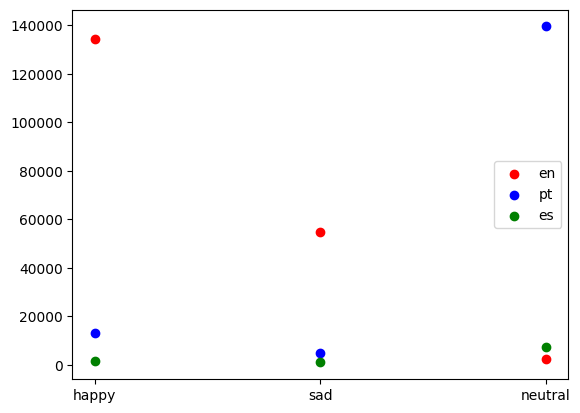

In [12]:
counts = df_en['sentiment'].value_counts()
#plt.scatter(x=counts.index, y=counts.values, color= 'blue')
#Compare sentiment of top 3 languages and represent on this scatterplot
counts1 = df_pt['sentiment'].value_counts()
counts2 = df_es['sentiment'].value_counts()
plt.scatter(counts.index, counts.values, color='red', label='en')
plt.scatter(counts1.index, counts1.values, color='blue', label='pt')
plt.scatter(counts2.index, counts2.values, color='green', label='es')
plt.legend()
plt.show()

In [13]:
df=df_en
df

,Lyric,language,sentiment
69,I feel so unsure\nAs I take your hand and lead...,en,happy
86,"Don't let them fool, ya\nOr even try to school...",en,happy
88,"Baby, let's cruise, away from here\nDon't be c...",en,happy
111,"Know it sounds funny\nBut, I just can't stand ...",en,happy
140,You've got that look again\nThe one I hoped I ...,en,happy
...,...,...,...
379926,Chorus\nHere we stand waiting on the plain\nDa...,en,sad
379927,I nearly disappeared into the mouth of a croco...,en,happy
379928,"Amambuka, amambuka azothengisa izwe lakithi, i...",en,happy
379929,Sweat in the heat for days on end\nwaiting for...,en,happy


In [14]:
#In the next four steps we are doing downsampling as the number of "happy" instances are very high in comparison to the "sad" andd "neutral" ones.
rows_to_remove = df[df['sentiment'] == 'happy'].sample(n=79000)

In [15]:
rows_to_remove['sentiment'].value_counts()

happy    79000
Name: sentiment, dtype: int64

In [16]:
df_modified = df.drop(rows_to_remove.index)

In [17]:
df_modified['sentiment'].value_counts()

happy      55386
sad        54946
neutral     2482
Name: sentiment, dtype: int64

In [18]:
#In the next four steps we reomve all the "neutral" instances as they are too low
neutral_senti_rows_to_remove = df[df['sentiment'] == 'neutral']

In [19]:
neutral_senti_rows_to_remove['sentiment'].value_counts()

neutral    2482
Name: sentiment, dtype: int64

In [20]:
df_modified = df_modified.drop(neutral_senti_rows_to_remove.index)

In [21]:
df_modified['sentiment'].value_counts()

happy    55386
sad      54946
Name: sentiment, dtype: int64

In [22]:
df_modified.head()

,Lyric,language,sentiment
69,I feel so unsure\nAs I take your hand and lead...,en,happy
111,"Know it sounds funny\nBut, I just can't stand ...",en,happy
140,You've got that look again\nThe one I hoped I ...,en,happy
975,This is my carnaval aye aye aye ha\n(Mr. World...,en,happy
979,From the day we arrive on the planet\nAnd blin...,en,happy


In [23]:
#We are now modifying our data set as such --> "<happy/sad>: <yrics>"
df_modified['lyrics_with_sentiment'] = df_modified['sentiment'] + ": " + df_modified['Lyric']

In [24]:
df_modified.head()

,Lyric,language,sentiment,lyrics_with_sentiment
69,I feel so unsure\nAs I take your hand and lead...,en,happy,happy: I feel so unsure\nAs I take your hand a...
111,"Know it sounds funny\nBut, I just can't stand ...",en,happy,"happy: Know it sounds funny\nBut, I just can't..."
140,You've got that look again\nThe one I hoped I ...,en,happy,happy: You've got that look again\nThe one I h...
975,This is my carnaval aye aye aye ha\n(Mr. World...,en,happy,happy: This is my carnaval aye aye aye ha\n(Mr...
979,From the day we arrive on the planet\nAnd blin...,en,happy,happy: From the day we arrive on the planet\nA...


In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.3 MB/s eta 0:00:00


In [ ]:
#Training set (80/20 split)
df_modified_truncated = df_modified.iloc[:2000]

#Vaidation set
df_modified_validation_set = df_modified[2000:2500]

In [ ]:
df_modified_truncated['lyrics_with_sentiment'].to_csv('lyrics_dataset_modified.txt', index=False, header=None)

In [ ]:
df_modified_validation_set['lyrics_with_sentiment'].to_csv('lyrics_validation_set.txt', index=False, header=None)

In [ ]:
!pip install accelerate>=0.20.1

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TextDataset, DataCollatorForLanguageModeling
from torch.utils.data import DataLoader

# Load pre-trained GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize dataset and create TextDataset
def load_dataset(file_path, tokenizer):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=128
    )
    return dataset

train_dataset = load_dataset('lyrics_dataset_modified.txt', tokenizer)
validation_dataset = load_dataset('lyrics_validation_set.txt', tokenizer)

# Data collator to create batches
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False,
)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [ ]:
from transformers import Trainer, TrainingArguments

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define training arguments
training_args = TrainingArguments(
    output_dir="./output",
    overwrite_output_dir=True,
    num_train_epochs=5,
    evaluation_strategy="epoch",
    per_device_train_batch_size=4,
    save_steps=100,
    save_total_limit=2,
    logging_dir='./logs',
)

# Create a Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
)

# Fine-tune the model
trainer.train()

In [ ]:
trainer.save_model("./output")

In [ ]:
eval_results = trainer.evaluate()

# Calculate perplexity
import math
perplexity = math.exp(eval_results["eval_loss"])
print("Perplexity:", perplexity)

In [ ]:
from transformers import pipeline

# Load the fine-tuned model and create a text generation pipeline
generator = pipeline('text-generation', model='./output', tokenizer=tokenizer)

# Generate new lyrics with a sentiment prompt
generated_text = generator("sad: ", max_length=100, num_return_sequences=1)[0]['generated_text']
print(generated_text)

In [ ]:
# Generate new lyrics with a sentiment prompt
generated_text = generator("happy: ", max_length=100, num_return_sequences=1)[0]['generated_text']
print(generated_text)